In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections
from sklearn import tree

In [3]:
dataBPC = pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Assign 3/wpbc.csv', index_col='ID number') 

In [4]:
dataBPC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 119513 to 947489
Data columns (total 34 columns):
Outcome                198 non-null object
Time                   198 non-null int64
radius 1               198 non-null float64
texture 1              198 non-null float64
perimeter 1            198 non-null float64
area 1                 198 non-null float64
smoothness 1           198 non-null float64
compactness 1          198 non-null float64
concavity 1            198 non-null float64
concave points 1       198 non-null float64
symmetry 1             198 non-null float64
fractal dimension 1    198 non-null float64
radius 2               198 non-null float64
texture 2              198 non-null float64
perimeter 2            198 non-null float64
area 2                 198 non-null float64
smoothness 2           198 non-null float64
compactness 2          198 non-null float64
concavity 2            198 non-null float64
concave points 2       198 non-null float64
symmetry 2

## Filling missing values

In [5]:
dataBPC['Lymph node status'].fillna(dataBPC['Lymph node status'].median(), inplace = True)

In [6]:
dataBPC.isnull().sum()

Outcome                0
Time                   0
radius 1               0
texture 1              0
perimeter 1            0
area 1                 0
smoothness 1           0
compactness 1          0
concavity 1            0
concave points 1       0
symmetry 1             0
fractal dimension 1    0
radius 2               0
texture 2              0
perimeter 2            0
area 2                 0
smoothness 2           0
compactness 2          0
concavity 2            0
concave points 2       0
symmetry 2             0
fractal dimension 2    0
radius 3               0
texture 3              0
perimeter 3            0
area 3                 0
smoothness 3           0
compactness 3          0
concavity 3            0
concave points 3       0
symmetry 3             0
fractal dimension 3    0
Tumor size             0
Lymph node status      0
dtype: int64

# Question 1

## Ignoring No. of Years (Time) atrribute

In [7]:
X1 = dataBPC.loc[:,'radius 1':'Lymph node status']
y1 = dataBPC['Outcome']

### 1 a)

In [8]:
dt_clf = DecisionTreeClassifier(criterion='gini',splitter='best',min_samples_leaf=25, class_weight={'N':1,'R':2})
score = cross_val_score(dt_clf, X1, y1, cv =4)
score

array([ 0.68  ,  0.68  ,  0.6   ,  0.5625])

In [9]:
fit_clf = dt_clf.fit(X1,y1)
fit_clf.predict(X1)

array(['N', 'R', 'N', 'N', 'R', 'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'R', 'N', 'N', 'R', 'R', 'R', 'R', 'N', 'N', 'R', 'N',
       'N', 'R', 'N', 'R', 'R', 'R', 'N', 'R', 'N', 'R', 'N', 'N', 'N',
       'N', 'R', 'N', 'N', 'N', 'N', 'N', 'R', 'R', 'R', 'N', 'R', 'N',
       'N', 'N', 'N', 'R', 'N', 'N', 'R', 'R', 'R', 'N', 'R', 'N', 'N',
       'N', 'N', 'R', 'R', 'R', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'R', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N', 'R',
       'N', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'R', 'N', 'N', 'N', 'N',
       'R', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'N', 'N', 'R', 'R',
       'N', 'R', 'R', 'N', 'N', 'R', 'N', 'N', 'N', 'R', 'N', 'R', 'R',
       'N', 'N', 'R', 'N', 'N', 'N', 'N', 'R', 'N', 'R', 'N', 'N', 'R',
       'N', 'R', 'R', 'N', 'N', 'R', 'R', 'R', 'N', 'N', 'N', 'N', 'R',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'R', 'R', 'N', 'N', 'N

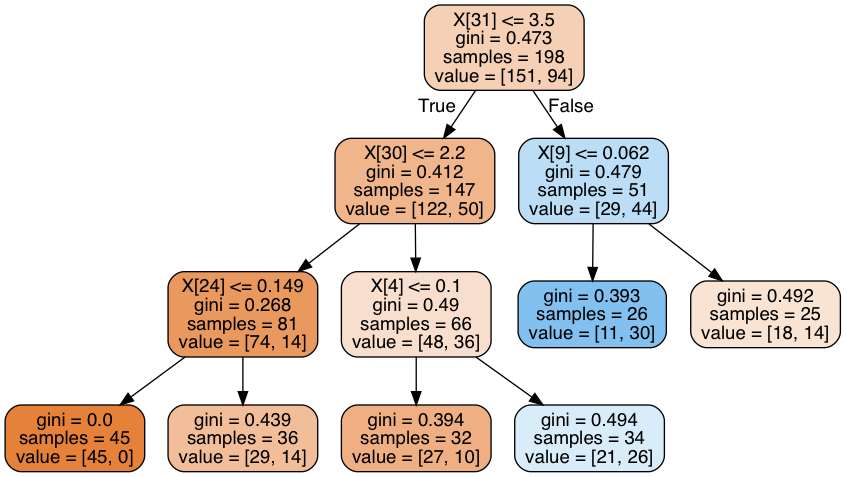

In [10]:
%matplotlib inline
dot_data = tree.export_graphviz(fit_clf,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
  
Image(graph.create_png())

# Question 2

### Selecting required features (ignoring the class attribute (R or N))

In [11]:
X2 = dataBPC.loc[:,'radius 1':'Lymph node status']
y2 = dataBPC.loc[:,'Time']

In [12]:
X2.head()

,radius 1,texture 1,perimeter 1,area 1,smoothness 1,compactness 1,concavity 1,concave points 1,symmetry 1,fractal dimension 1,...,perimeter 3,area 3,smoothness 3,compactness 3,concavity 3,concave points 3,symmetry 3,fractal dimension 3,Tumor size,Lymph node status
ID number,,,,,,,,,,,,,,,,,,,,,
119513,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
8423,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
842517,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
843483,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
843584,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0


In [13]:
y2.head()

ID number
119513     31
8423       61
842517    116
843483    123
843584     27
Name: Time, dtype: int64

## 2 a) Spliting data in training set and test set

In [14]:
X2_train, X2_test, y2_train, y2_test = X2[:132], X2[132:], y2[:132], y2[132:]

In [15]:
avgYears = y2_train.mean()   # calculating average number of disease-free years 
print('average number of disease-free years ' + str(avgYears))

average number of disease-free years 58.833333333333336


### Calculating MSE

In [16]:
def MSE(y,avg):
    MSEValue = ((y - avg)**2).mean()
    return MSEValue

In [17]:
trainMSE = MSE(y2_train,avgYears)
print('MSE for training set: \t' + str(trainMSE))

MSE for training set: 	1183.9419191919192


In [18]:
testMSE = MSE(y2_test,avgYears)
print('MSE for testing set: \t' + str(testMSE))

MSE for testing set: 	1616.4924242424247


## 2b) Making function for correlation

In [19]:
def correlation(x1,x2):    
    meanAttr1 = x1.mean()
    meanAttr2 = x2.mean()
    corr1 = ((x1 - meanAttr1)*(x2 - meanAttr2)).sum()
    corr2 = ((((x1 - meanAttr1)**2).sum())*(((x2 - meanAttr2)**2).sum()))**(1/2)
    corr = corr1/corr2
    return corr


In [20]:
def correlationCheck(X,y):
    corrAllFeatures = []
    features = X.keys()
    for i in features:
        corre = correlation(X[i], y)
        corrAllFeatures.append(abs(corre))
        print('Correlation of output with ' + i +'\t\t'+ str(corre))
    return corrAllFeatures

In [21]:
featuresToCheck = ['radius 1', 'texture 1', 'perimeter 1', 'area 1 ', 'smoothness 1',
       'compactness 1', 'concavity 1', 'concave points 1', 'symmetry 1',
       'fractal dimension 1', 'radius 2', 'texture 2', 'perimeter 2', 'area 2',
       'smoothness 2', 'compactness 2', 'concavity 2', 'concave points 2',
       'symmetry 2', 'fractal dimension 2', 'radius 3', 'texture 3 ',
       'perimeter 3', 'area 3', 'smoothness 3', 'compactness 3', 'concavity 3',
       'concave points 3', 'symmetry 3', 'fractal dimension 3', 'Tumor size',
       'Lymph node status']

## Initiating a structure for saving tree

In [22]:
class Tree(object):
    def __init__(self,name):
        self.name = name
        self.left = None
        self.right = None
        self.data = None

In [23]:
t_1 = Tree('t_1')  # defining the root node

## Spliting root node 1(X_train) to get 1a and 1b
### Calculating Correlation of all featuers with 'no. of desease free years'

In [24]:
correlationList = correlationCheck(X2_train,y2_train)

Correlation of output with radius 1		-0.3646604075150667
Correlation of output with texture 1		-0.1302759028465298
Correlation of output with perimeter 1		-0.37330876008058334
Correlation of output with area 1		-0.36933189005221195
Correlation of output with smoothness 1		0.13208365897275284
Correlation of output with compactness 1		-0.045900250285935716
Correlation of output with concavity 1		-0.16806454500699036
Correlation of output with concave points 1		-0.21425175736946708
Correlation of output with symmetry 1		0.094061607123029
Correlation of output with fractal dimension 1		0.2604458863493912
Correlation of output with radius 2		-0.2386906695227489
Correlation of output with texture 2		-0.16824732375961687
Correlation of output with perimeter 2		-0.26033353594356895
Correlation of output with area 2		-0.27242857993022745
Correlation of output with smoothness 2		0.023284766460944985
Correlation of output with compactness 2		-0.06945706058214933
Correlation of output with concavi

### Finding feature with max correlation

In [25]:
maxFeatureIndex = correlationList.index(max(correlationList))
maxFeature = featuresToCheck[maxFeatureIndex]
print('Maximun correlated feature is: \t' + maxFeature)

Maximun correlated feature is: 	perimeter 1


### splitting according to 'perimeter 1'

In [26]:
medianVal = X2_train['perimeter 1'].median()    # split point
print('Median value for spliting feature:' + str(medianVal))

Median value for spliting feature:110.05


In [27]:
X2_train_split_1a = X2_train[X2_train['perimeter 1'] > medianVal]
X2_train_split_1b = X2_train[X2_train['perimeter 1'] <= medianVal]
y2_train_split_1a = y2_train[X2_train['perimeter 1'] > medianVal]
y2_train_split_1b = y2_train[X2_train['perimeter 1'] <= medianVal]

In [28]:
X2_train_split_1a.shape  #shape of left child

(66, 32)

In [29]:
X2_train_split_1b.shape   #shape of right child

(66, 32)

### Calculating MSE of node 1a & 1b

In [30]:
trainMSE_split_1a = MSE(y2_train_split_1a,y2_train_split_1a.mean())
print('MSE for node 1a: \t' +str(trainMSE_split_1a))

MSE for node 1a: 	933.3785583103765


In [31]:
trainMSE_split_1b = MSE(y2_train_split_1b,y2_train_split_1b.mean())
print('MSE for node 1b: \t' +str(trainMSE_split_1b))

MSE for node 1b: 	1170.7017906336087


### Saving the childs in tree

In [32]:
t_1.data = [maxFeature, medianVal]
t_1a = Tree('1a')
t_1.left = t_1a
t_1b = Tree('1b')
t_1.right = t_1b

## 2c) Repeating the steps
### Furthur spliting node 1a

In [33]:
correlationList = correlationCheck(X2_train_split_1a,y2_train_split_1a)

Correlation of output with radius 1		-0.2690373629728443
Correlation of output with texture 1		-0.14413519229752597
Correlation of output with perimeter 1		-0.3007033263512784
Correlation of output with area 1		-0.2823173096054564
Correlation of output with smoothness 1		-0.024160691628605777
Correlation of output with compactness 1		-0.13618786643286265
Correlation of output with concavity 1		-0.15039887611197222
Correlation of output with concave points 1		-0.14828815269495804
Correlation of output with symmetry 1		0.13220514208677442
Correlation of output with fractal dimension 1		0.17049731650428407
Correlation of output with radius 2		-0.08987998680712486
Correlation of output with texture 2		-0.2593290913401531
Correlation of output with perimeter 2		-0.14006457869243874
Correlation of output with area 2		-0.12336178009164273
Correlation of output with smoothness 2		0.038205895309628195
Correlation of output with compactness 2		-0.1876831371241239
Correlation of output with conca

### Finding feature with max correlation

In [34]:
maxFeatureIndex = correlationList.index(max(correlationList))
maxFeature = featuresToCheck[maxFeatureIndex]
print('Maximun correlated feature is: \t' + maxFeature)

Maximun correlated feature is: 	perimeter 3


### splitting according to 'perimeter 3'

In [35]:
medianVal = X2_train_split_1a['perimeter 3'].median()    # split point
print('Median value for spliting feature:' + str(medianVal))

Median value for spliting feature:157.6


In [36]:
X2_train_split_1a_2a = X2_train_split_1a[X2_train_split_1a['perimeter 3'] > medianVal]
X2_train_split_1a_2b = X2_train_split_1a[X2_train_split_1a['perimeter 3'] <= medianVal]
y2_train_split_1a_2a = y2_train_split_1a[X2_train_split_1a['perimeter 3'] > medianVal]
y2_train_split_1a_2b = y2_train_split_1a[X2_train_split_1a['perimeter 3'] <= medianVal]

In [37]:
X2_train_split_1a_2a.shape    #shape of left child

(32, 32)

In [38]:
X2_train_split_1a_2b.shape    #shape of right child

(34, 32)

### Calculating MSE for nodes 1a_2a  & 1a_2b

In [39]:
trainMSE_split_1a_2a = MSE(y2_train_split_1a_2a, y2_train_split_1a_2a.mean())
print('MSE for node 1a_2a: \t' +str(trainMSE_split_1a_2a))

MSE for node 1a_2a: 	815.3349609375


In [40]:
trainMSE_split_1a_2b = MSE(y2_train_split_1a_2b, y2_train_split_1a_2b.mean())
print('MSE for node 1a_2b: \t' +str(trainMSE_split_1a_2b))

MSE for node 1a_2b: 	845.262975778547


### No need to expand any child as MSE of both < 900

### Saving the childs in tree

In [41]:
t_1a.data = [maxFeature, medianVal]
t_1a_2a = Tree('1a_2a')
t_1a.left = t_1a_2a
t_1a_2a.data = [y2_train_split_1a_2a.mean(), y2_train_split_1a_2a]    # saving the mean value in leaf node
t_1a_2b = Tree('1a_2b')
t_1a.right = t_1a_2b
t_1a_2b.data = [y2_train_split_1a_2b.mean(), y2_train_split_1a_2b]    # saving the mean value in leaf node

# Spliting node 1b

In [42]:
correlationList = correlationCheck(X2_train_split_1b,y2_train_split_1b)

Correlation of output with radius 1		-0.046325597398544784
Correlation of output with texture 1		-0.010510713125853026
Correlation of output with perimeter 1		-0.04229064108871293
Correlation of output with area 1		-0.03643939886925064
Correlation of output with smoothness 1		0.14235642692476075
Correlation of output with compactness 1		0.07787549581932697
Correlation of output with concavity 1		0.02544278119774275
Correlation of output with concave points 1		0.045365917035214635
Correlation of output with symmetry 1		0.07027672874453575
Correlation of output with fractal dimension 1		0.13628369604851492
Correlation of output with radius 2		-0.06017116052351698
Correlation of output with texture 2		-0.03263896661305459
Correlation of output with perimeter 2		-0.07195784089528633
Correlation of output with area 2		-0.029447621366455824
Correlation of output with smoothness 2		0.05553411346534128
Correlation of output with compactness 2		0.05171229515118508
Correlation of output with con

### Finding feature with max correlation

In [43]:
maxFeatureIndex = correlationList.index(max(correlationList))
maxFeature = featuresToCheck[maxFeatureIndex]
print('Maximun correlated feature is: \t' + maxFeature)

Maximun correlated feature is: 	Tumor size


### splitting according to 'Tumor size'

In [44]:
medianVal = X2_train_split_1b['Tumor size'].median()    # split point
print('Median value for spliting feature: \t' + str(medianVal))

Median value for spliting feature: 	1.95


In [45]:
X2_train_split_1b_2c = X2_train_split_1b[X2_train_split_1b['Tumor size'] > medianVal]
X2_train_split_1b_2d = X2_train_split_1b[X2_train_split_1b['Tumor size'] <= medianVal]
y2_train_split_1b_2c = y2_train_split_1b[X2_train_split_1b['Tumor size'] > medianVal]
y2_train_split_1b_2d = y2_train_split_1b[X2_train_split_1b['Tumor size'] <= medianVal]

In [46]:
X2_train_split_1b_2c.shape    #shape of left child

(33, 32)

In [47]:
X2_train_split_1b_2d.shape    #shape of right child

(33, 32)

### Calculating MSE for nodes 1b_2c  & 1b_2d

In [48]:
trainMSE_split_1b_2c = MSE(y2_train_split_1b_2c, y2_train_split_1b_2c.mean())
print('MSE for node 1b_2c: \t' +str(trainMSE_split_1b_2c))

MSE for node 1b_2c: 	1144.955004591368


In [49]:
trainMSE_split_1b_2d = MSE(y2_train_split_1b_2d, y2_train_split_1b_2d.mean())
print('MSE for node 1b_2d: \t' +str(trainMSE_split_1b_2d))

MSE for node 1b_2d: 	1192.1285583103763


### Saving childs in tree

In [50]:
t_1b.data = [maxFeature, medianVal]
t_1b_2c = Tree('1b_2c')
t_1b.left = t_1b_2c
t_1b_2d = Tree('1b_2d')
t_1b.right = t_1b_2d
t_1b_2d.data = [y2_train_split_1b_2d.mean(), y2_train_split_1b_2d]    # saving the mean value in leaf node

# Spliting node 1b_2c

In [51]:
correlationList = correlationCheck(X2_train_split_1b_2c,y2_train_split_1b_2c)

Correlation of output with radius 1		-0.23675791852764555
Correlation of output with texture 1		-0.0969600005664381
Correlation of output with perimeter 1		-0.21026723093912444
Correlation of output with area 1		-0.22772116561043476
Correlation of output with smoothness 1		0.2996195948554076
Correlation of output with compactness 1		0.2856234630122013
Correlation of output with concavity 1		0.2177422989622318
Correlation of output with concave points 1		0.14960759118945607
Correlation of output with symmetry 1		0.28318178781468767
Correlation of output with fractal dimension 1		0.3431772533022843
Correlation of output with radius 2		-0.0671295564770444
Correlation of output with texture 2		-0.21599556797073466
Correlation of output with perimeter 2		-0.0800125898976915
Correlation of output with area 2		-0.07834193932402034
Correlation of output with smoothness 2		0.12362737434201808
Correlation of output with compactness 2		0.22973019115938378
Correlation of output with concavity 2		0

### Finding feature with max correlation

In [52]:
maxFeatureIndex = correlationList.index(max(correlationList))
maxFeature = featuresToCheck[maxFeatureIndex]
print('Maximun correlated feature is: \t' + maxFeature)

Maximun correlated feature is: 	symmetry 3


### splitting according to 'smoothness 2'

In [53]:
medianVal = X2_train_split_1b_2c['symmetry 3'].median()    # split point
print('Median value for spliting feature: \t' + str(medianVal))

Median value for spliting feature: 	0.3485


In [54]:
X2_train_split_1b_2c_3a = X2_train_split_1b_2c[X2_train_split_1b_2c['symmetry 3'] > medianVal]
X2_train_split_1b_2c_3b = X2_train_split_1b_2c[X2_train_split_1b_2c['symmetry 3'] <= medianVal]
y2_train_split_1b_2c_3a = y2_train_split_1b_2c[X2_train_split_1b_2c['symmetry 3'] > medianVal]
y2_train_split_1b_2c_3b = y2_train_split_1b_2c[X2_train_split_1b_2c['symmetry 3'] <= medianVal]

In [55]:
X2_train_split_1b_2c_3a.shape    #shape of left child

(16, 32)

In [56]:
X2_train_split_1b_2c_3b.shape    #shape of right child

(17, 32)

### Calculating MSE for nodes 1b_2c_3a  & 1b_2c_3b

In [57]:
trainMSE_split_1b_2c_3a = MSE(y2_train_split_1b_2c_3a, y2_train_split_1b_2c_3a.mean())
print('MSE for node 1b_2c_3a: \t' +str(trainMSE_split_1b_2c_3a))

MSE for node 1b_2c_3a: 	1280.6875


In [58]:
trainMSE_split_1b_2c_3b = MSE(y2_train_split_1b_2c_3b, y2_train_split_1b_2c_3b.mean())
print('MSE for node 1b_2c_3b: \t' +str(trainMSE_split_1b_2c_3b))

MSE for node 1b_2c_3b: 	980.8304498269897


### Saving the childs in tree

In [60]:
t_1b_2c.data = [maxFeature, medianVal]
t_1b_2c_3a = Tree('1b_2c_3a')
t_1b_2c.left = t_1b_2c_3a
t_1b_2c_3b = Tree('1b_2c_3b')
t_1b_2c.right = t_1b_2c_3b
t_1b_2c_3b.data = [y2_train_split_1b_2c_3b.mean(), y2_train_split_1b_2c_3b]    # saving the mean value in leaf node

## Spliting node 1b_2c_3a

In [71]:
correlationList = correlationCheck(X2_train_split_1b_2c_3a,y2_train_split_1b_2c_3a)

maxFeatureIndex = correlationList.index(max(correlationList))
featuresToCheck = X2_train_split_1b_2c_3a.keys()
maxFeature = featuresToCheck[maxFeatureIndex]

print('\n Maximun correlated feature is: \t' + maxFeature)
medianVal = X2_train_split_1b_2c_3a[maxFeature].median()    # split point
print('\n Median value for spliting feature: \t' + str(medianVal))

X2_train_split_1b_2c_3a_4a = X2_train_split_1b_2c_3a[X2_train_split_1b_2c_3a[maxFeature] > medianVal]
X2_train_split_1b_2c_3a_4b = X2_train_split_1b_2c_3a[X2_train_split_1b_2c_3a[maxFeature] <= medianVal]
y2_train_split_1b_2c_3a_4a = y2_train_split_1b_2c_3a[X2_train_split_1b_2c_3a[maxFeature] > medianVal]
y2_train_split_1b_2c_3a_4b = y2_train_split_1b_2c_3a[X2_train_split_1b_2c_3a[maxFeature] <= medianVal]

print('\n Size of child nodes are: \t' + str(y2_train_split_1b_2c_3a_4b.size))

trainMSE_split_1b_2c_3a_4a = MSE(y2_train_split_1b_2c_3a_4a, y2_train_split_1b_2c_3a_4a.mean())
print('\n MSE for node 1b_2c_3a_4a: \t' +str(trainMSE_split_1b_2c_3a))

trainMSE_split_1b_2c_3a_4b = MSE(y2_train_split_1b_2c_3a_4b, y2_train_split_1b_2c_3a_4b.mean())
print('\n MSE for node 1b_2c_3a_4b: \t' +str(trainMSE_split_1b_2c_3b))


Correlation of output with radius 1		-0.5027601277473197
Correlation of output with texture 1		-0.5358994017272385
Correlation of output with perimeter 1		-0.5031159704360926
Correlation of output with area 1		-0.4570988310619956
Correlation of output with smoothness 1		0.30266507470648457
Correlation of output with compactness 1		0.2519473554087262
Correlation of output with concavity 1		-0.009275798700003302
Correlation of output with concave points 1		-0.014784076988535611
Correlation of output with symmetry 1		0.36643640298564073
Correlation of output with fractal dimension 1		0.3697560509044348
Correlation of output with radius 2		0.08313698591500653
Correlation of output with texture 2		-0.24024319088481932
Correlation of output with perimeter 2		0.00403161826898926
Correlation of output with area 2		-0.009517120800246328
Correlation of output with smoothness 2		0.002663755737402068
Correlation of output with compactness 2		0.2161626810416415
Correlation of output with concavity 

### Stop growing tree as minimum instances per leaf node is 8

### Saving childs in tree

In [62]:
t_1b_2c_3a.data = [maxFeature, medianVal]
t_1b_2c_3a_4a = Tree('1b_2c_3a_4a')
t_1b_2c_3a.left = t_1b_2c_3a_4a
t_1b_2c_3a_4a.data = [y2_train_split_1b_2c_3a_4a.mean(), y2_train_split_1b_2c_3a_4a]  #saving the mean value in leaf node
t_1b_2c_3a_4b = Tree('1b_2c_3a_4b')
t_1b_2c_3a.right = t_1b_2c_3a_4b
t_1b_2c_3a_4b.data = [y2_train_split_1b_2c_3a_4b.mean(), y2_train_split_1b_2c_3a_4b]  #saving the mean value in leaf node

# Tree structure Completed

### Function for traversing tree

In [63]:
def preorder(tree):
    if tree:
        print('\nNode name: \t\t\t\t' + str(tree.name))
        if(tree.left == None):
            print('Leaf Node')
            print('Population of leaf node is: \t\t' + str(tree.data[1].size))
            print('Avg. value at leaf node is: \t\t' + str(tree.data[0]))
        else:
            print('Attribute spliting the node is: \t' + tree.data[0])
            print('Mean value that splits the node is: \t' + str(tree.data[1]))
        preorder(tree.left)
        preorder(tree.right)

def leafNodes(tree):
    if tree:
        if(tree.left == None):
            print('\nLeaf node name: \t\t\t' + str(tree.name))
            print('Population of leaf node is: \t\t' + str(tree.data[1].size))
            print('Avg. value at leaf node is: \t\t' + str(tree.data[0]))
        leafNodes(tree.left)
        leafNodes(tree.right)

## Structure of resulting Regression tree 

In [64]:
preorder(t_1)


Node name: 				t_1
Attribute spliting the node is: 	perimeter 1
Mean value that splits the node is: 	110.05

Node name: 				1a
Attribute spliting the node is: 	perimeter 3
Mean value that splits the node is: 	157.6

Node name: 				1a_2a
Leaf Node
Population of leaf node is: 		32
Avg. value at leaf node is: 		36.90625

Node name: 				1a_2b
Leaf Node
Population of leaf node is: 		34
Avg. value at leaf node is: 		57.1764705882353

Node name: 				1b
Attribute spliting the node is: 	Tumor size
Mean value that splits the node is: 	1.95

Node name: 				1b_2c
Attribute spliting the node is: 	symmetry 3
Mean value that splits the node is: 	0.3485

Node name: 				1b_2c_3a
Attribute spliting the node is: 	texture 3
Mean value that splits the node is: 	31.105

Node name: 				1b_2c_3a_4a
Leaf Node
Population of leaf node is: 		8
Avg. value at leaf node is: 		59.125

Node name: 				1b_2c_3a_4b
Leaf Node
Population of leaf node is: 		8
Avg. value at leaf node is: 		93.375

Node name: 				1b_2c_3b
Le

## Details of leaf Node

In [65]:
leafNodes(t_1)


Leaf node name: 			1a_2a
Population of leaf node is: 		32
Avg. value at leaf node is: 		36.90625

Leaf node name: 			1a_2b
Population of leaf node is: 		34
Avg. value at leaf node is: 		57.1764705882353

Leaf node name: 			1b_2c_3a_4a
Population of leaf node is: 		8
Avg. value at leaf node is: 		59.125

Leaf node name: 			1b_2c_3a_4b
Population of leaf node is: 		8
Avg. value at leaf node is: 		93.375

Leaf node name: 			1b_2c_3b
Population of leaf node is: 		17
Avg. value at leaf node is: 		67.58823529411765

Leaf node name: 			1b_2d
Population of leaf node is: 		33
Avg. value at leaf node is: 		68.84848484848484


#### Defining function to predict value & calculate MSE over a tree

In [66]:
def predictValue(x,rootOfTree):
    presentNode = rootOfTree
    for i in range(10):
        if(presentNode.left == None):
            return presentNode.data[0]
        elif(x[presentNode.data[0]] > presentNode.data[1]):
            presentNode = presentNode.left
        else:
            presentNode = presentNode.right

            
def MSETree(X,y,rootOfTree):
    error = 0
    for i in range(len(X)):
        yPred = predictValue(X.iloc[i],rootOfTree)
        error = error + (y.iloc[i] - yPred)**2
    return error/len(X)
            

## Calculating MSE of training set over the tree

In [67]:
MSETrain = MSETree(X2_train,y2_train,t_1)
print('MSE of traing set over the tree is: \t' +str(MSETrain))

MSE of traing set over the tree is: 	959.414924226


## Calculating MSE of test set over the tree

In [68]:
MSETest = MSETree(X2_test,y2_test,t_1)
print('MSE of testing set over the tree is: \t' +str(MSETest))

MSE of testing set over the tree is: 	1528.29901333


# 2 d) Analysis:

#### Defining function to calculate MSE of each leaf node

In [69]:
def MSELeafNode(tree):
    if tree:
        if(tree.left == None):
            print('\nLeaf node name: \t\t' + str(tree.name))
            MSEAtLeaf = MSE(tree.data[1], tree.data[0])
            print('MSE at leaf node is: \t\t' + str(MSEAtLeaf))
        MSELeafNode(tree.left)
        MSELeafNode(tree.right)

In [70]:
MSELeafNode(t_1)


Leaf node name: 		1a_2a
MSE at leaf node is: 		815.3349609375

Leaf node name: 		1a_2b
MSE at leaf node is: 		845.262975778547

Leaf node name: 		1b_2c_3a_4a
MSE at leaf node is: 		974.109375

Leaf node name: 		1b_2c_3a_4b
MSE at leaf node is: 		1000.734375

Leaf node name: 		1b_2c_3b
MSE at leaf node is: 		980.8304498269897

Leaf node name: 		1b_2d
MSE at leaf node is: 		1192.1285583103763


In [ ]:
# Analysis: 

# Question 3

In [2]:
dataWWQ = pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Assign 3/winequality-white.csv')

In [3]:
dataWWQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
X3 = dataWWQ.loc[:,'fixed acidity':'alcohol']
y3 = dataWWQ.loc[:,'quality']
X3.shape

(4898, 11)

## Making train and test datasets

In [94]:
X3_train, X3_test, y3_train, y3_test = X3[:3000], X3[3000:], y3[:3000], y3[3000:]

### Initial MSE of training data

In [95]:
trainMSE = MSE(y3_train, y3_train.mean())
print('MSE for training data: \t' +str(trainMSE))

MSE for training data: 	0.8362132222222316


### MSE of test data

In [96]:
testMSE = MSE(y3_test, y3_train.mean())
print('MSE for test data: \t' +str(testMSE))

MSE for test data: 	0.7064365845919731


# Making function for spliting a node for regression tree

In [97]:

def split(X,y):
    correlationList = correlationCheck(X,y)
    maxFeatureIndex = correlationList.index(max(correlationList))
    featuresToCheck = X.keys()
    maxFeature = featuresToCheck[maxFeatureIndex]
    print('\n Maximun correlated feature is: \t\t' + maxFeature)
    medianVal = X[maxFeature].median()    # split point
    print('\n Median value for spliting feature: \t' + str(medianVal))
    X_leftChild = X[X[maxFeature] > medianVal]
    X_rightChild = X[X[maxFeature] <= medianVal]
    y_leftChild = y[X[maxFeature] > medianVal]
    y_rightChild = y[X[maxFeature] <= medianVal]
    trainMSE_leftChild = MSE(y_leftChild, y_leftChild.mean())
    print('\n MSE for node left child: \t\t' +str(trainMSE_leftChild))
    trainMSE_rightChild = MSE(y_rightChild, y_rightChild.mean())
    print('\n MSE for node right child: \t\t' +str(trainMSE_rightChild))
    return [X_leftChild, X_rightChild, y_leftChild, y_rightChild, maxFeature, medianVal]  



### Initiating a structure for saving tree

In [98]:
class Tree(object):
    def __init__(self,name):
        self.name = name
        self.left = None
        self.right = None
        self.data = None

## Spliting X3 (root node 1) into 1a and 1b

In [194]:
model = split(X3_train,y3_train)  # model contains datasets after split

Correlation of output with fixed acidity		-0.10143445258192141
Correlation of output with volatile acidity		-0.21728285431212072
Correlation of output with citric acid		-0.003811604921858443
Correlation of output with residual sugar		-0.12480814054014668
Correlation of output with chlorides		-0.19557234985547556
Correlation of output with free sulfur dioxide		0.03105969363873351
Correlation of output with total sulfur dioxide		-0.1492022630946953
Correlation of output with density		-0.3081459870022807
Correlation of output with pH		0.15875132343727888
Correlation of output with sulphates		0.08795467999530462
Correlation of output with alcohol		0.44340646051967825

 Maximun correlated feature is: 	alcohol

 Median value for spliting feature: 	10.1

 MSE for node left child: 	0.8910990866934998

 MSE for node right child: 	0.5628735051699983


### Not expanding right child (1b) 
### Making the two datasets for 1a and 1b

In [195]:
X3_train_split_1a, X3_train_split_1b = model[0], model[1]
y3_train_split_1a, y3_train_split_1b = model[2], model[3]

### Saving root and its child in tree 

In [196]:
t1 = Tree('1')
t1.data = [model[4], model[5]]

In [197]:
t1a = Tree('1a')
t1.left = t1a
t1b = Tree('1b')
t1.right = t1b
t1b.data = [y3_train_split_1b.mean(), y3_train_split_1b]    # saving the mean value in leaf node


# Spliting node 1a

In [198]:
model = split(X3_train_split_1a,y3_train_split_1a)  # model contains datasets after split

Correlation of output with fixed acidity		-0.19331580938851206
Correlation of output with volatile acidity		-0.08440642236352647
Correlation of output with citric acid		-0.009485036778327526
Correlation of output with residual sugar		-0.005896156083784396
Correlation of output with chlorides		-0.13656287016553414
Correlation of output with free sulfur dioxide		0.1790402991225685
Correlation of output with total sulfur dioxide		-0.022328499607482878
Correlation of output with density		-0.22498835868557354
Correlation of output with pH		0.15613324472734974
Correlation of output with sulphates		0.10220104879300111
Correlation of output with alcohol		0.3487049226638857

 Maximun correlated feature is: 	alcohol

 Median value for spliting feature: 	11.1

 MSE for node left child: 	0.876560285577275

 MSE for node right child: 	0.7750290282203207


### Making datasets for child nodes

In [134]:
X3_train_split_1a_2a, X3_train_split_1a_2b = model[0], model[1]
y3_train_split_1a_2a, y3_train_split_1a_2b = model[2], model[3]

### Saving Both the child nodes in tree

In [199]:
t1a.data = [model[4], model[5]]
t1a_2a = Tree('1a_2a')
t1a.left = t1a_2a
t1a_2b = Tree('1a_2b')
t1a.right = t1a_2b
t1a_2b.data = [y3_train_split_1a_2b.mean(), y3_train_split_1a_2b]   # saving mean value in leaf node

# Spliting node 1a_2a

In [200]:
model = split(X3_train_split_1a_2a, y3_train_split_1a_2a)  # model contains datasets after split

Correlation of output with fixed acidity		-0.1904480855337412
Correlation of output with volatile acidity		0.06931945253883465
Correlation of output with citric acid		-0.05534307621163023
Correlation of output with residual sugar		0.012532029820572799
Correlation of output with chlorides		-0.12911701911811158
Correlation of output with free sulfur dioxide		0.28798661438644274
Correlation of output with total sulfur dioxide		0.12432555271529801
Correlation of output with density		-0.11849854445185949
Correlation of output with pH		0.19908250966387206
Correlation of output with sulphates		0.12224693117691378
Correlation of output with alcohol		0.25970753451733036

 Maximun correlated feature is: 	free sulfur dioxide

 Median value for spliting feature: 	29.0

 MSE for node left child: 	0.7439678996598621

 MSE for node right child: 	0.9507311105820254


### No need to split right child (1a_2a_3a) further

In [137]:
X3_train_split_1a_2a_3a, X3_train_split_1a_2a_3b  = model[0], model[1]
y3_train_split_1a_2a_3a, y3_train_split_1a_2a_3b = model[2], model[3]

### Saving nodes in tree

In [201]:
t1a_2a.data = [model[4], model[5]]
t1a_2a_3a = Tree('1a_2a_3a')
t1a_2a.left = t1a_2a_3a
t1a_2a_3a.data = [y3_train_split_1a_2a_3a.mean(), y3_train_split_1a_2a_3a]    # saving mean value in leaf node
t1a_2a_3b = Tree('1a_2a_3b')
t1a_2a.right = t1a_2a_3b

# Splitting node 1a_2a_3b

In [202]:
model = split(X3_train_split_1a_2a_3b, y3_train_split_1a_2a_3b)  # model contains datasets after split

Correlation of output with fixed acidity		-0.1849875628044388
Correlation of output with volatile acidity		0.025519740125877266
Correlation of output with citric acid		-0.06020524867036842
Correlation of output with residual sugar		-0.017306213514716826
Correlation of output with chlorides		-0.13123368152715617
Correlation of output with free sulfur dioxide		0.4334476134565866
Correlation of output with total sulfur dioxide		0.14178435504363268
Correlation of output with density		-0.10418299153330153
Correlation of output with pH		0.2109706385877491
Correlation of output with sulphates		0.1727841539585724
Correlation of output with alcohol		0.23460662536309848

 Maximun correlated feature is: 	free sulfur dioxide

 Median value for spliting feature: 	20.0

 MSE for node left child: 	0.5480971632864446

 MSE for node right child: 	1.1533768078512405


### No need to expand further as we are at level 4 (to protect model from overfitting)

In [140]:
X3_train_split_1a_2a_3b_4a, X3_train_split_1a_2a_3b_4b  = model[0], model[1]
y3_train_split_1a_2a_3b_4a, y3_train_split_1a_2a_3b_4b = model[2], model[3]

### Saving nodes in tree

In [203]:
t1a_2a_3b.data = [model[4], model[5]]

t1a_2a_3b_4a = Tree('1a_2a_3b_4a')
t1a_2a_3b.left = t1a_2a_3b_4a
t1a_2a_3b_4a.data = [y3_train_split_1a_2a_3b_4a.mean(), y3_train_split_1a_2a_3b_4a]  # saving mean value in leaf node

t1a_2a_3b_4b = Tree('1a_2a_3b_4b')
t1a_2a_3b.right = t1a_2a_3b_4b
t1a_2a_3b_4b.data = [y3_train_split_1a_2a_3b_4b.mean(), y3_train_split_1a_2a_3b_4b]   # saving mean value in leaf node

# Tree Structure Completed

### Function for traversing tree

In [204]:
def preorder(tree):
    if tree:
        print('\nNode name: \t\t\t\t' + str(tree.name))
        if(tree.left == None):
            print('Leaf Node')
            print('Population of leaf node is: \t\t' + str(tree.data[1].size))
            print('Avg. value at leaf node is: \t\t' + str(tree.data[0]))
        else:
            print('Attribute spliting the node is: \t' + tree.data[0])
            print('Mean value that splits the node is: \t' + str(tree.data[1]))
        preorder(tree.left)
        preorder(tree.right)

def leafNodes(tree):
    if tree:
        if(tree.left == None):
            print('\nLeaf node name: \t\t\t' + str(tree.name))
            print('Population of leaf node is: \t\t' + str(tree.data[1].size))
            print('Avg. value at leaf node is: \t\t' + str(tree.data[0]))
        leafNodes(tree.left)
        leafNodes(tree.right)

## 3 a) Structure of resulting Regression tree 

In [206]:
preorder(t1)


Node name: 				1
Attribute spliting the node is: 	alcohol
Mean value that splits the node is: 	10.1

Node name: 				1a
Attribute spliting the node is: 	alcohol
Mean value that splits the node is: 	11.1

Node name: 				1a_2a
Attribute spliting the node is: 	free sulfur dioxide
Mean value that splits the node is: 	29.0

Node name: 				1a_2a_3a
Leaf Node
Population of leaf node is: 		336
Avg. value at leaf node is: 		6.633928571428571

Node name: 				1a_2a_3b
Attribute spliting the node is: 	free sulfur dioxide
Mean value that splits the node is: 	20.0

Node name: 				1a_2a_3b_4a
Leaf Node
Population of leaf node is: 		173
Avg. value at leaf node is: 		6.618497109826589

Node name: 				1a_2a_3b_4b
Leaf Node
Population of leaf node is: 		176
Avg. value at leaf node is: 		5.994318181818182

Node name: 				1a_2b
Leaf Node
Population of leaf node is: 		743
Avg. value at leaf node is: 		5.946164199192463

Node name: 				1b
Leaf Node
Population of leaf node is: 		1572
Avg. value at leaf node i

## Details of leaf Node

In [207]:
leafNodes(t1)


Leaf node name: 			1a_2a_3a
Population of leaf node is: 		336
Avg. value at leaf node is: 		6.633928571428571

Leaf node name: 			1a_2a_3b_4a
Population of leaf node is: 		173
Avg. value at leaf node is: 		6.618497109826589

Leaf node name: 			1a_2a_3b_4b
Population of leaf node is: 		176
Avg. value at leaf node is: 		5.994318181818182

Leaf node name: 			1a_2b
Population of leaf node is: 		743
Avg. value at leaf node is: 		5.946164199192463

Leaf node name: 			1b
Population of leaf node is: 		1572
Avg. value at leaf node is: 		5.510178117048346


#### Defining function to predict value & calculate MSE over a tree

In [211]:
def predictValue(x,rootOfTree):
    presentNode = rootOfTree
    for i in range(10):
        if(presentNode.left == None):
            return presentNode.data[0]
        elif(x[presentNode.data[0]] > presentNode.data[1]):
            presentNode = presentNode.left
        else:
            presentNode = presentNode.right

            
def MSETree(X,y,rootOfTree):
    error = 0
    for i in range(len(X)):
        yPred = predictValue(X.iloc[i],rootOfTree)
        error = error + (y.iloc[i] - yPred)**2
    return error/len(X)
            

#### Testing predictValue funtion

In [212]:
predictValue(X3_train.iloc[0],t1)

5.510178117048346

### Calculating MSE for training set over the tree

In [214]:
MSETrain = MSETree(X3_train,y3_train,t1)
print('MSE of traing set over the tree is: \t' +str(MSETrain))

MSE of traing set over the tree is: 	0.669490686604


### Calculating MSE for testing set over the tree

In [215]:
MSETest = MSETree(X3_test,y3_test,t1)
print('MSE of testing set over the tree is: \t' +str(MSETest))

MSE of testing set over the tree is: 	0.584194924738


#### Defining function to calculate MSE of each leaf node

In [222]:
    def MSELeafNode(tree):
        if tree:
            if(tree.left == None):
                print('\nLeaf node name: \t\t' + str(tree.name))
                MSEAtLeaf = MSE(tree.data[1], tree.data[0])
                print('MSE at leaf node is: \t\t' + str(MSEAtLeaf))
            MSELeafNode(tree.left)
            MSELeafNode(tree.right)

## 3 b) Analyzing best and worst paths 

In [224]:
MSELeafNode(t1)


Leaf node name: 		1a_2a_3a
MSE at leaf node is: 		0.7439678996598621

Leaf node name: 		1a_2a_3b_4a
MSE at leaf node is: 		0.5480971632864446

Leaf node name: 		1a_2a_3b_4b
MSE at leaf node is: 		1.1533768078512405

Leaf node name: 		1a_2b
MSE at leaf node is: 		0.7750290282203207

Leaf node name: 		1b
MSE at leaf node is: 		0.5628735051699983


#### Path to nodes "1a_2a_3b_4a" & "1b" are best paths as they have really low MSE
#### Whereas path to node "1a_2a_3b_4b" is worst path as it has high MSE

# Question 4

In [225]:
dataRWQ = pd.read_csv('/Volumes/Work/study/U Cincinnati/IDA/assignments/Assign 3/winequality-red.csv')

In [227]:
dataRWQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [228]:
X4 = dataWWQ.loc[:,'fixed acidity':'alcohol']
y4 = dataWWQ.loc[:,'quality']
X4.shape

(4898, 11)

### Computing MSE of red wines using tree of white wine

In [230]:
MSERedWine = MSETree(X4,y4,t1)
print('MSE of red wines: \t' + str(MSERedWine))

MSE of red wines: 	0.636438143521


### Comparision of MSE of white wine with red wine

In [232]:
print('MSE of red wines: \t' + str(MSERedWine))
print('MSE of white wines: \t' + str(MSETest))

MSE of red wines: 	0.636438143521
MSE of white wines: 	0.584194924738


### From the above values it can be concluded that tree model works better on white wines because tree is trained using the values of white wine instances. 
### But since the difference of MSE values of both the wines are small, white wine tree can be used to predict quality of red wines 